<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/TransformacionesGeome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook
%matplotlib inline


/content/drive/My Drive/colab/images


# **Escalado**

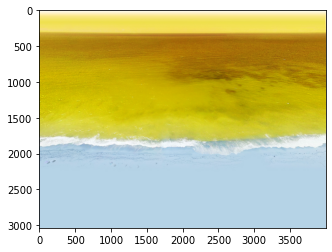

In [3]:


img = cv2.imread('playa.jpg')

res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

plt.imshow(res)

# **Translacióón**

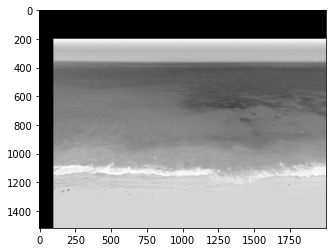

In [6]:
img = cv2.imread('playa.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,200]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst, cmap="gray")


# **Rotación**

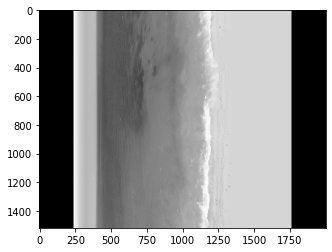

In [7]:
img = cv2.imread('playa.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) # (centro, angulo, escala)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst, cmap="gray")

# **Transformacióón Afin**

In [0]:
img = cv2.imread('playa.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# **Transformacióón de Perspectiva**

In [0]:
img = cv2.imread('sudokusmall.png')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


In [0]:
#@title Transformation Parameters { run: "auto" }

img_BGR=cv2.imread('playa.jpg',cv2.IMREAD_COLOR)
img_RGB=cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)

theta_degrees = 0 #@param {type:"slider", min:0, max:360, step:10}
shift_x = 100 #@param {type:"slider", min:-100, max:100, step:2}
shift_y = 100 #@param {type:"slider", min:-100, max:100, step:2}

# We can also play around with rotations by defining our M matrix, 
# which has the form:
"""
| cos(theta) -sin(theta) tx | 
| sin(theta)  cos(theta) ty |
"""

rows, cols, _ = img_RGB.shape

radians = theta_degrees * np.pi / 180
M = [
        [np.cos(radians), -np.sin(radians), shift_x], 
        [np.sin(radians),  np.cos(radians), shift_y]
    ]

M = np.array(M)
rows += int(shift_x)
cols += int(shift_y)

res = cv2.warpAffine(img_RGB, M, (cols,rows))

plt.imshow(res)
plt.show()